In [22]:
import os
import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_metrics(path: str) -> tuple[list[dict], list[dict], dict]:
    with open(path) as f:
        results = [json.loads(line.removesuffix('\n').replace('\'', '\"')) for line in f.readlines() if line.removesuffix('\n')]


    results, train_final_metric = results[:-1], results[-1]
    train_metrics, eval_metrics = results[0::2], results[1::2]

    return train_metrics, eval_metrics, train_final_metric

In [ ]:
train_metrics, eval_metrics, train_final_metric = load_metrics('dpo_training.txt')
corrupted_train_metrics, corrupted_eval_metrics, corrupted_train_final_metric \
    = load_metrics('dpo_training_corrupt.txt')

In [4]:
def plots(train_metrics: list[dict], eval_metrics: list[dict], metric_keys: list[str], y_axis_label: str, title: str, x_axis_label: str = 'epoch'):


    x_axis = np.array([metric[x_axis_label] for metric in train_metrics])

    for metric_key in metric_keys:
        train_metric = np.array([metric[f'{metric_key}'] for metric in train_metrics])
        eval_metric = np.array([metric[f'eval_{metric_key}'] for metric in eval_metrics])

        plt.plot(x_axis, train_metric, label=f'train {metric_key}')
        plt.plot(x_axis, eval_metric, label=f'eval {metric_key}')
        # if add_corrupted:
        #     plt.plot(permuted_indices, train_metric, marker='c', linestyle='None')
    

    plt.title(title)
    plt.xlabel(x_axis_label.capitalize())
    plt.ylabel(f'{y_axis_label.capitalize()}')
    plt.grid(True)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
def plot(train_metrics: list[dict], eval_metrics: list[dict], metric_key: str, y_axis_label: str, title: str, x_axis_label: str = 'epoch'):
    x_axis = np.array([metric[x_axis_label] for metric in train_metrics])
    train_metric = np.array([metric[f'{metric_key}'] for metric in train_metrics])
    eval_metric = np.array([metric[f'eval_{metric_key}'] for metric in eval_metrics])

    plt.plot(x_axis, train_metric, label=f'train {y_axis_label}')
    plt.plot(x_axis, eval_metric, label=f'eval {y_axis_label}')
    plt.title(title)
    plt.xlabel(x_axis_label.capitalize())
    plt.ylabel(f'{y_axis_label.capitalize()}')
    plt.grid(True)

    plt.legend()
    plt.tight_layout()
    plt.show()

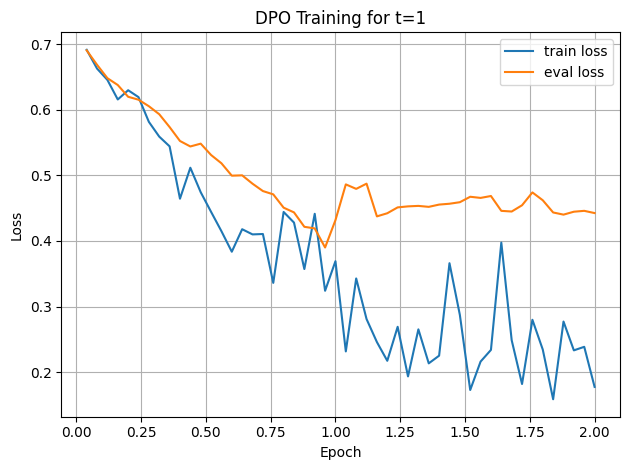

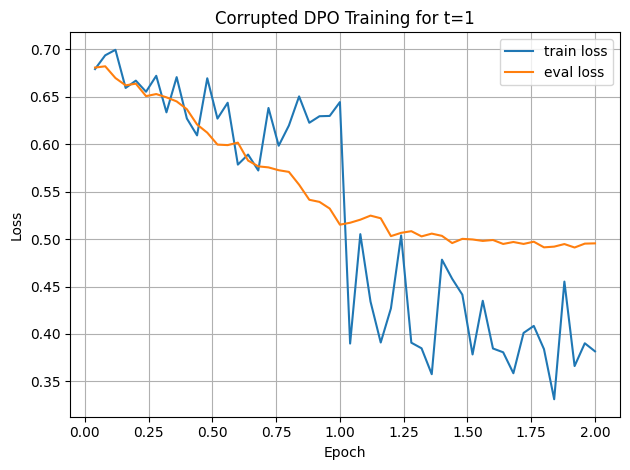

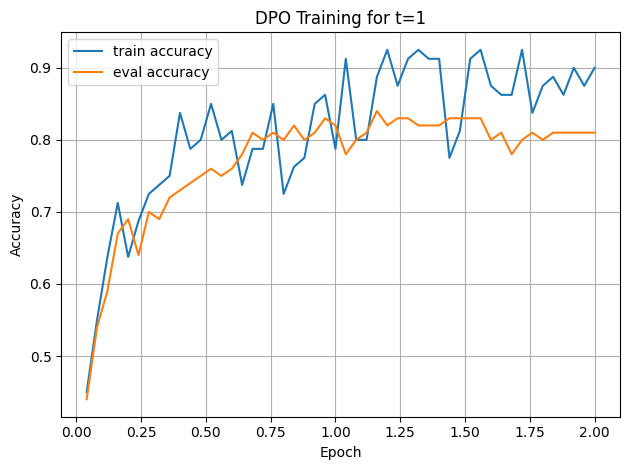

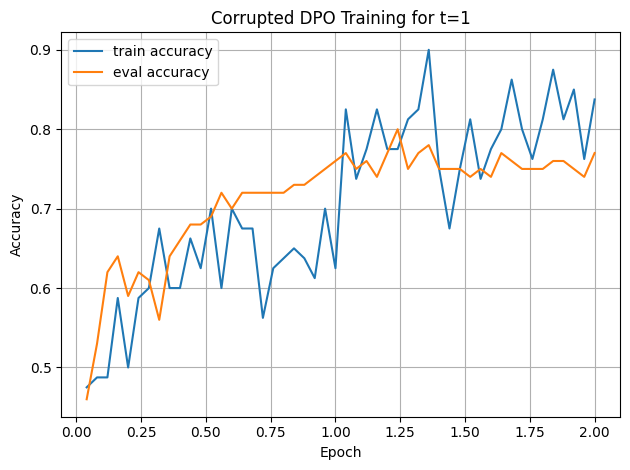

In [6]:
plot(train_metrics, eval_metrics, 
     metric_key='loss', y_axis_label='loss',
     title='DPO Training for t=1')

plot(corrupted_train_metrics, corrupted_eval_metrics, 
     metric_key='loss', y_axis_label='loss',
     title='Corrupted DPO Training for t=1')

plot(train_metrics, eval_metrics, 
     metric_key='rewards/accuracies', y_axis_label='accuracy', 
     title='DPO Training for t=1')

plot(corrupted_train_metrics, corrupted_eval_metrics, 
     metric_key='rewards/accuracies', y_axis_label='accuracy', 
     title='Corrupted DPO Training for t=1')

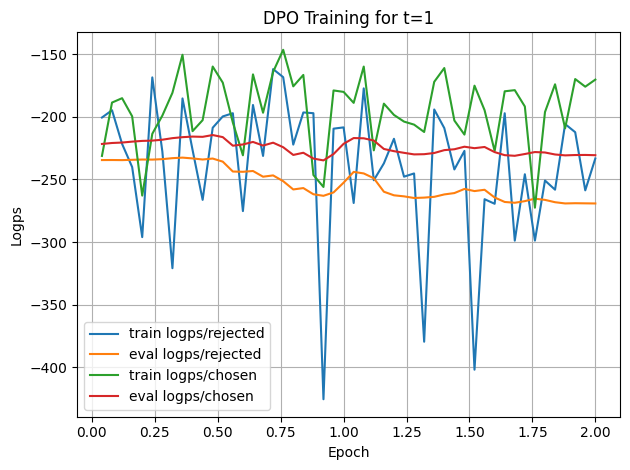

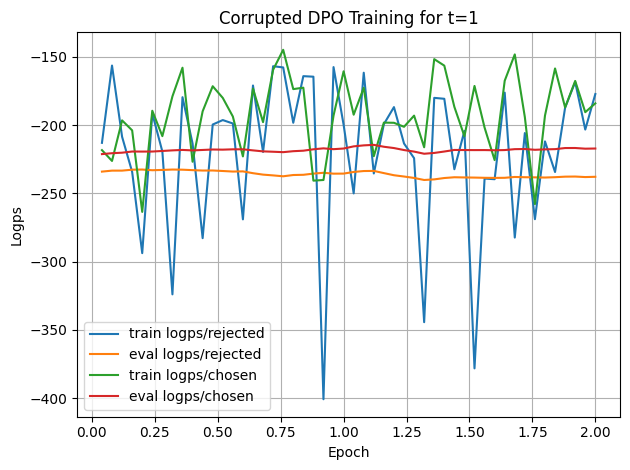

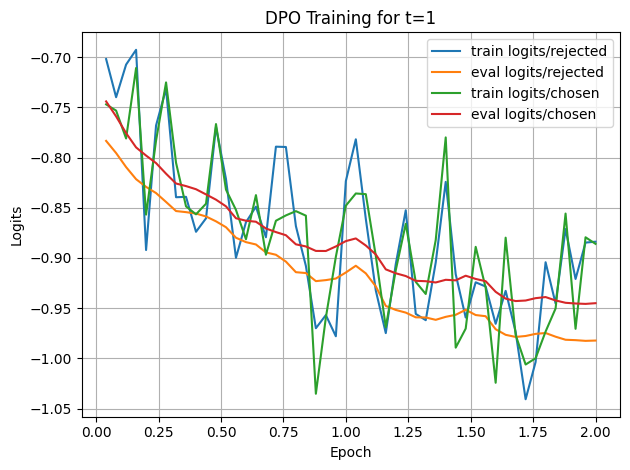

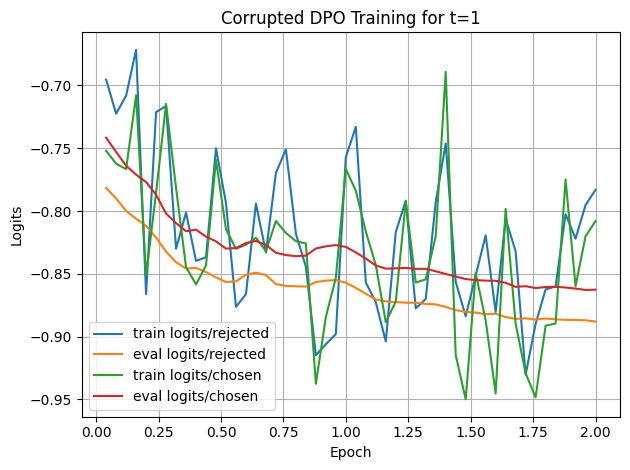

In [7]:
plots(train_metrics, eval_metrics, 
     metric_keys=['logps/rejected', 'logps/chosen'], y_axis_label='logps',
     title='DPO Training for t=1')

plots(corrupted_train_metrics, corrupted_eval_metrics, 
     metric_keys=['logps/rejected', 'logps/chosen'], y_axis_label='logps',
     title='Corrupted DPO Training for t=1')

plots(train_metrics, eval_metrics, 
     metric_keys=['logits/rejected', 'logits/chosen'], y_axis_label='logits',
     title='DPO Training for t=1')

plots(corrupted_train_metrics, corrupted_eval_metrics, 
     metric_keys=['logits/rejected', 'logits/chosen'], y_axis_label='logits',
     title='Corrupted DPO Training for t=1')

In [8]:
accepted_response_attn_score = np.array([-150.84275818, -138.31906128, -196.58979797, -156.59933472,
       -145.96615601, -150.52931213, -129.75682068, -131.40637207,
       -125.60826111, -134.65904236, -132.68510437, -136.05809021,
       -104.24207306, -132.39122009, -118.20938873, -125.3552475 ,
       -125.41088104, -129.94017029, -153.50650024, -151.42243958,
       -148.80877686, -140.93400574, -146.02807617, -152.01097107,
       -161.16046143, -160.43185425, -146.24899292, -153.10655212,
       -115.73773956, -150.01724243, -121.30107117,  -93.4316864 ])

rejected_response_attn_score = np.array([-150.26776123, -134.5160675 , -154.78442383, -146.59112549,
       -130.68878174, -134.30236816, -109.23898315, -116.79162598,
        -93.26016235, -102.11379242, -102.10191345, -106.66228485,
        -77.10712433,  -95.91215515,  -80.74992371,  -99.81895447,
       -102.32080841, -115.67222595, -130.74130249, -127.99694061,
       -129.70353699, -125.09207916, -133.72634888, -147.05903625,
       -130.23358154, -132.94363403, -121.65923309, -130.96412659,
        -94.67223358, -119.02914429,  -95.164711  ,  -70.59238434])

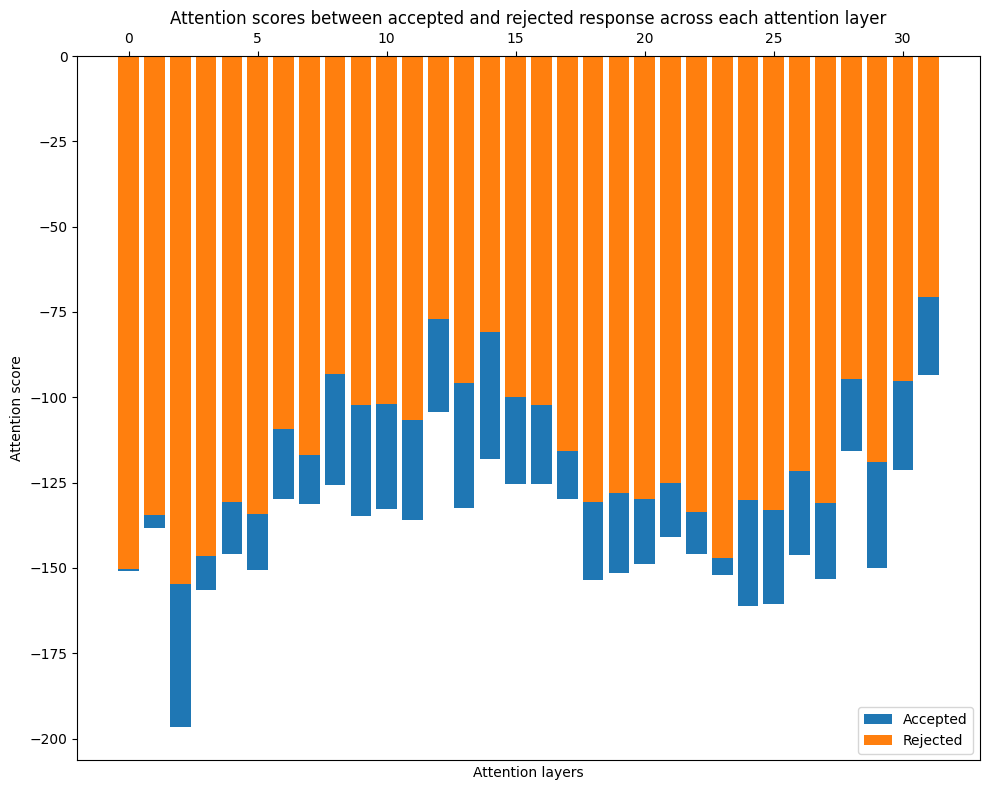

In [14]:
categories = list(range(32))
plt.figure(figsize=(10, 8))
plt.bar(categories, accepted_response_attn_score, label='Accepted')
plt.bar(categories, rejected_response_attn_score, label='Rejected')

plt.xlabel('Attention layers')
plt.ylabel('Attention score')

# plt.grid(True)

plt.title('Attention scores between accepted and rejected response across each attention layer')

plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
scores_10000 = np.load(os.path.join(os.getcwd(), 'scores_10k.npz'))['arr_0']

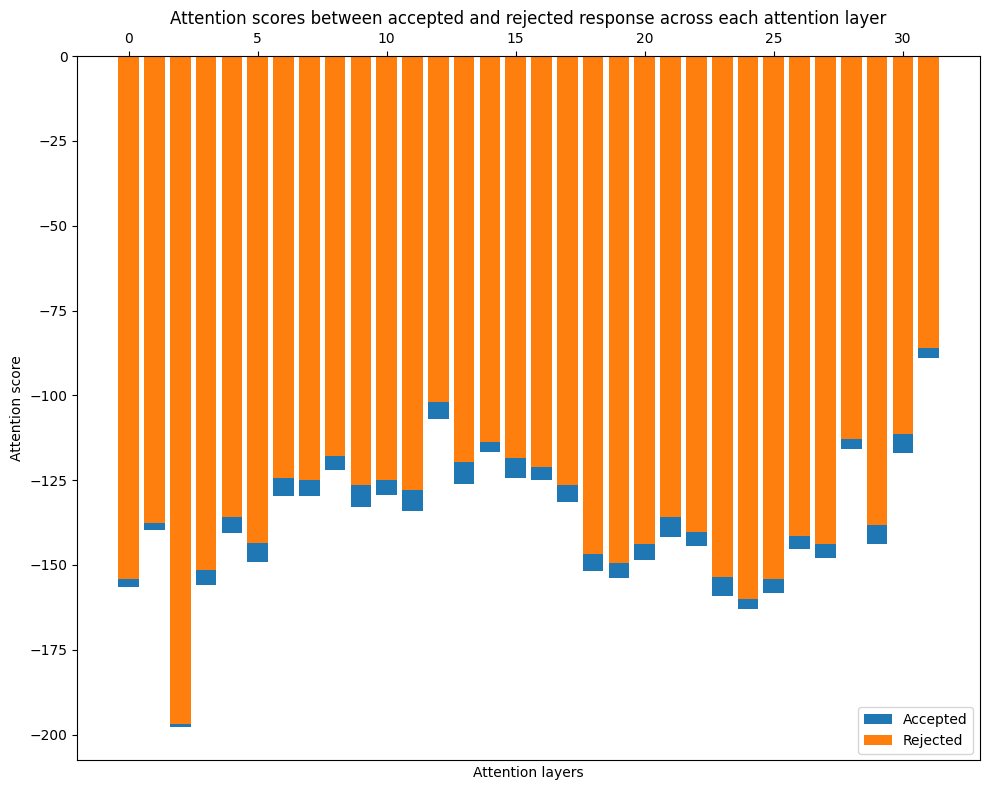

In [15]:
categories = list(range(32))
plt.figure(figsize=(10, 8))
plt.bar(categories, scores_10000[1860, 0, :], label='Accepted')
plt.bar(categories, scores_10000[1860, 1, :], label='Rejected')

plt.xlabel('Attention layers')
plt.ylabel('Attention score')

# plt.grid(True)

plt.title('Attention scores between accepted and rejected response across each attention layer')

plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
def get_counts_using_uncertainity_scores(scores: np.ndarray, threshold: float = 1.0) -> tuple[int, int]:

    sample_mean_uncertainity_mask = (scores[:, 1, :] / scores[:, 0, :]).mean(axis=-1) < threshold

    sample_mean_uncertainity_count = sample_mean_uncertainity_mask.sum()
    sample_mean_certainity_count = (~sample_mean_uncertainity_mask).sum()

    return sample_mean_uncertainity_count, sample_mean_certainity_count

In [8]:
scores_10000 = np.load(os.path.join(os.getcwd(), 'scores_10k.npz'))['arr_0']

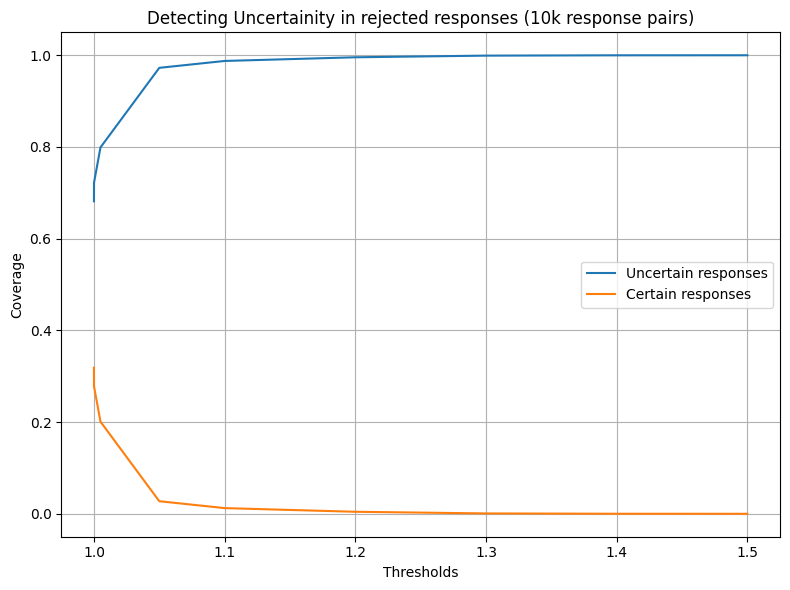

In [11]:

uncertain_responses_counts = []
certain_responses_counts = []
thresholds = sorted([1.5, 1.4, 1.3, 1.2, 1.1, 1.05, 1.005, 1.00005 ,1.0])

for threshold in thresholds:
    uncertain_responses_count, certain_responses_count =  get_counts_using_uncertainity_scores(scores_10000, threshold=threshold)
    uncertain_responses_counts.append(uncertain_responses_count / 10000)
    certain_responses_counts.append(certain_responses_count / 10000)

plt.figure(figsize=(8, 6))

plt.plot(thresholds, uncertain_responses_counts, label='Uncertain responses')
plt.plot(thresholds, certain_responses_counts, label='Certain responses')

plt.xlabel('Thresholds')
plt.ylabel('Coverage')

plt.title('Detecting Uncertainity in rejected responses (10k response pairs)')

plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

# Online DPO Plots

In [8]:
def load_metrics_from_json(path: str) -> tuple[list[dict], list[dict], dict]:
    with open(path) as fp:
        metrics = json.load(fp)

    metrics, train_final_metric = metrics[:-1], metrics[-1]
    train_metric, eval_metric = metrics[0::2], metrics[1::2]

    return train_metric, eval_metric, train_final_metric


def combine_metrics(train_metrics: list[list[dict]], eval_metrics: list[list[dict]], train_final_metrics: list[dict]) ->  tuple[list[dict], list[dict]]:
    combined_train_metric = []
    combined_eval_metric = []

    epochs = [0] + [train_final_metric['epoch'] for train_final_metric in train_final_metrics[:-1]]
    steps = [0] + [train_final_metric['step'] for train_final_metric in train_final_metrics[:-1]]

    for idx, (train_metric, eval_metric, step_offset, epoch_offset) in enumerate(zip(train_metrics, eval_metrics, steps, epochs)):
        for t_metric, e_metric in zip(train_metric, eval_metric):
            copy_t_metric = dict(t_metric)
            copy_e_metric = dict(e_metric)
            copy_t_metric['epoch'] += idx * epoch_offset
            copy_e_metric['epoch'] += idx * epoch_offset

            copy_t_metric['step'] += idx * step_offset
            copy_e_metric['step'] += idx * step_offset

            combined_train_metric.append(copy_t_metric)
            combined_eval_metric.append(copy_e_metric)

    return combined_train_metric, combined_eval_metric

In [24]:
online_train_metric_1, online_eval_metric_1, online_final_metric_1 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO', 'final_checkpoint_1', 'log_history_1.json'))
online_train_metric_2, online_eval_metric_2, online_final_metric_2 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO','final_checkpoint_2' , 'log_history_2.json'))

combined_online_train_metric, combined_online_eval_metric = combine_metrics([online_train_metric_1, online_train_metric_2],
                                                                            [online_eval_metric_1, online_eval_metric_2],
                                                                            [online_final_metric_1, online_final_metric_2])

online_train_metric_cor_1, online_eval_metric_cor_1, online_final_metric_cor_1 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_corruption' , 'final_checkpoint_1', 'log_history_1.json'))
online_train_metric_cor_2, online_eval_metric_cor_2, online_final_metric_cor_2 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_corruption','final_checkpoint_2' , 'log_history_2.json'))

combined_online_train_metric_cor, combined_online_eval_metric_cor = combine_metrics([online_train_metric_cor_1, online_train_metric_cor_2],
                                                                            [online_eval_metric_cor_1, online_eval_metric_cor_2],
                                                                            [online_final_metric_cor_1, online_final_metric_cor_2])

online_train_metric_mit_1, online_eval_metric_mit_1, online_final_metric_mit_1 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_mitigation' , 'final_checkpoint_1', 'log_history_1.json'))
online_train_metric_mit_2, online_eval_metric_mit_2, online_final_metric_mit_2 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_mitigation','final_checkpoint_2' , 'log_history_2.json'))

combined_online_train_metric_mit, combined_online_eval_metric_mit = combine_metrics([online_train_metric_mit_1, online_train_metric_mit_2],
                                                                            [online_eval_metric_mit_1, online_eval_metric_mit_2],
                                                                            [online_final_metric_mit_1, online_final_metric_mit_2])

online_train_metric_IHL_mit_1, online_eval_metric_IHL_mit_1, online_final_metric_IHL_mit_1 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_IHL_mitigation' , 'final_checkpoint_1', 'log_history_1.json'))
online_train_metric_IHL_mit_2, online_eval_metric_IHL_mit_2, online_final_metric_IHL_mit_2 = load_metrics_from_json(os.path.join('checkpoints', 'iter_DPO_IHL_mitigation','final_checkpoint_2' , 'log_history_2.json'))

combined_online_train_metric_IHL_mit, combined_online_eval_metric_IHL_mit = combine_metrics([online_train_metric_IHL_mit_1, online_train_metric_IHL_mit_2],
                                                                            [online_eval_metric_IHL_mit_1, online_eval_metric_IHL_mit_2],
                                                                            [online_final_metric_IHL_mit_1, online_final_metric_IHL_mit_2])                                                                           

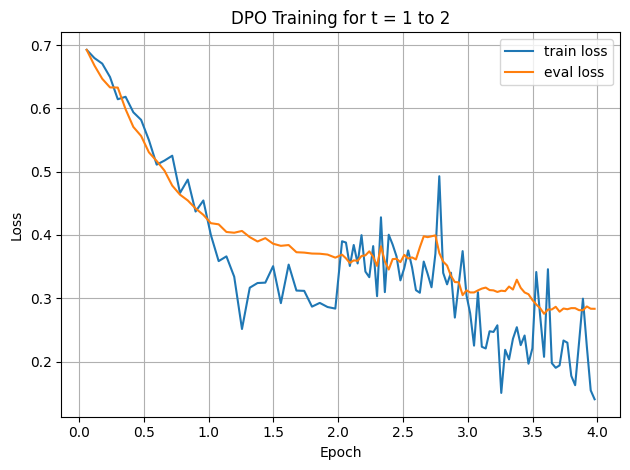

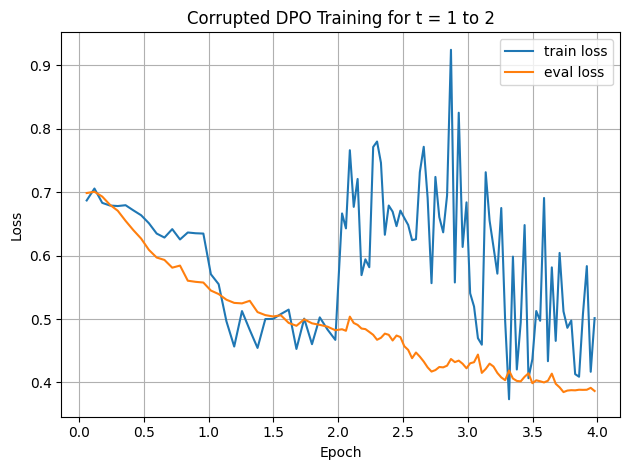

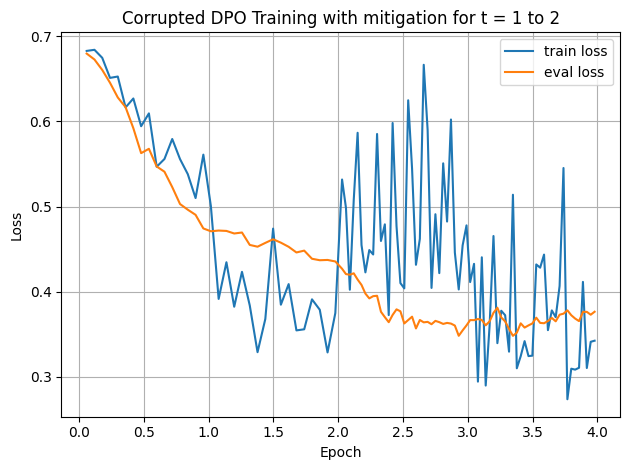

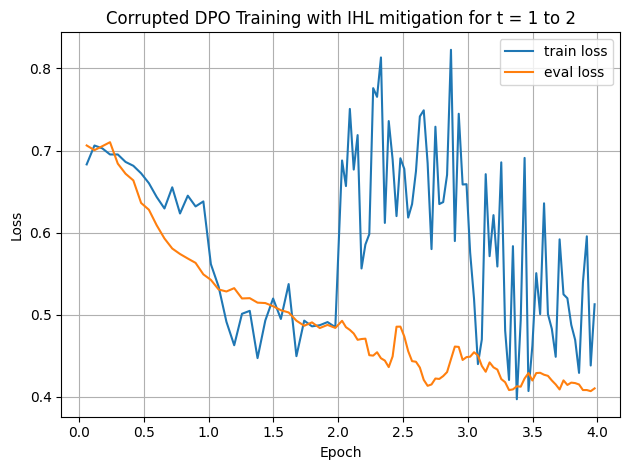

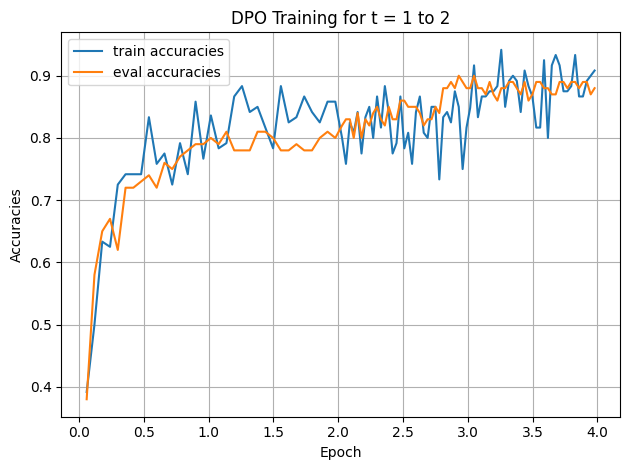

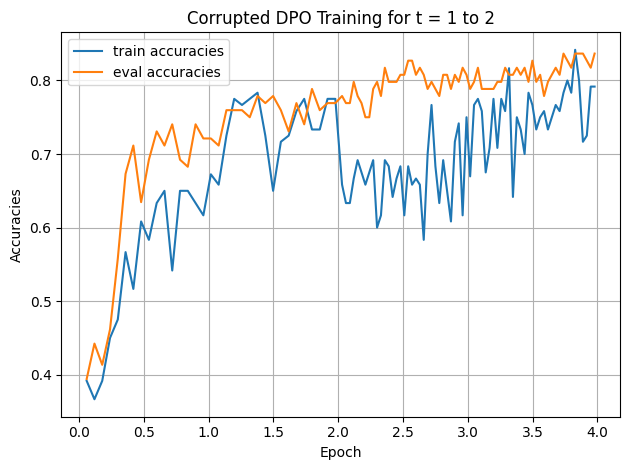

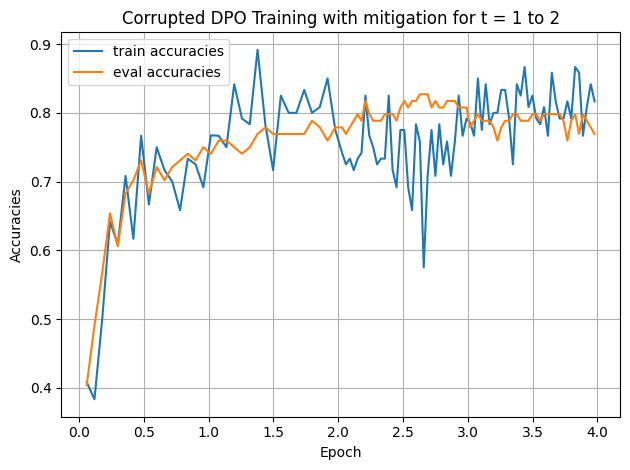

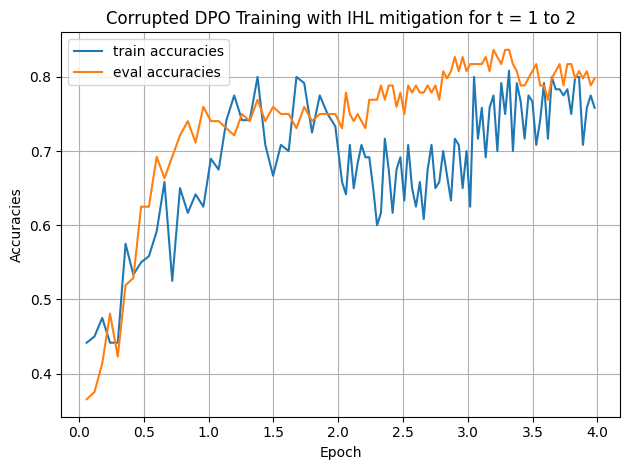

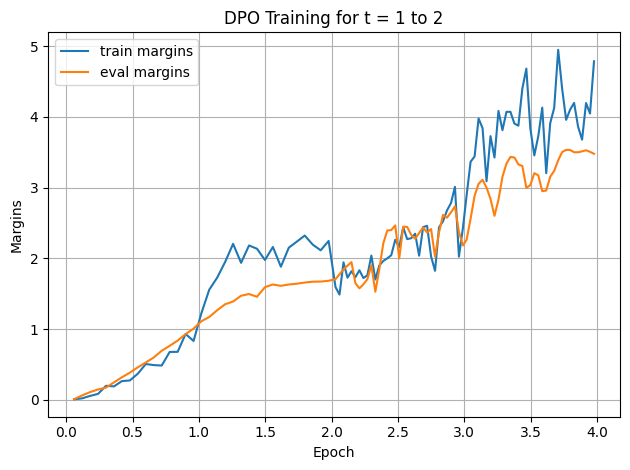

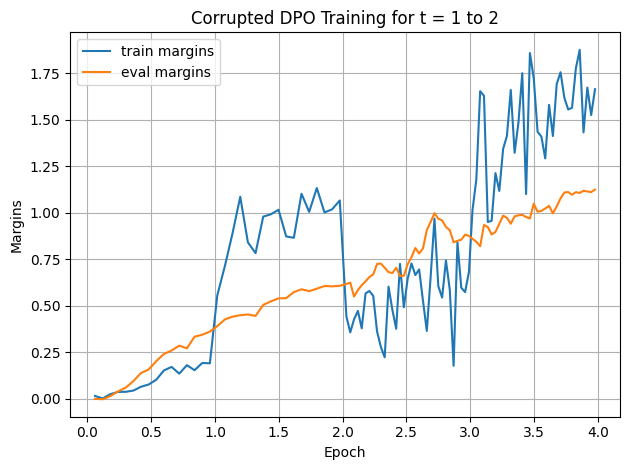

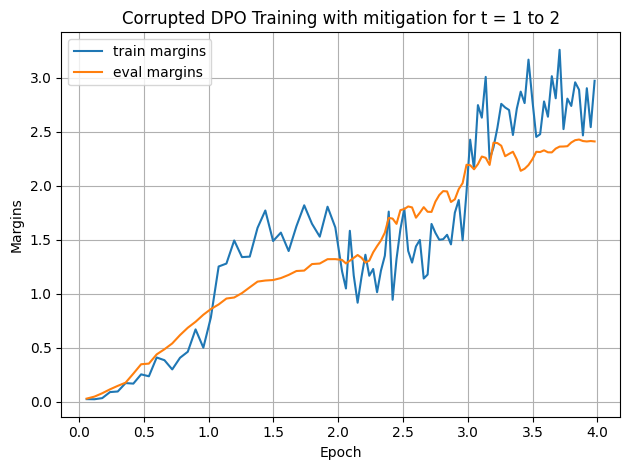

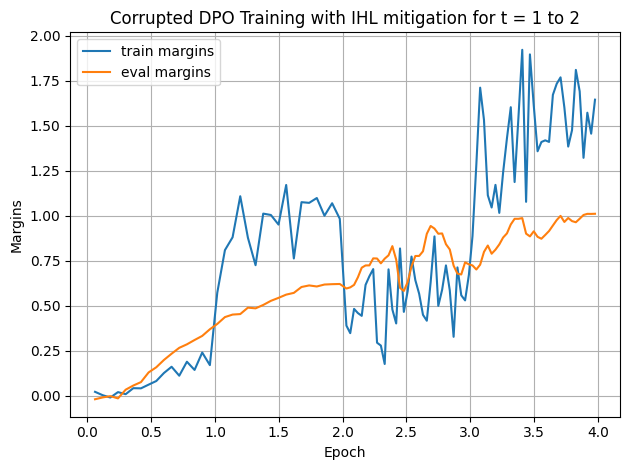

In [25]:
for metric_key, y_axis_label in zip(['loss' ,'rewards/accuracies', 'rewards/margins'], ['loss' ,'accuracies', 'margins']):
     plot(combined_online_train_metric, combined_online_eval_metric, 
          metric_key=metric_key, y_axis_label=y_axis_label,
          title='DPO Training for t = 1 to 2')

     plot(combined_online_train_metric_cor, combined_online_eval_metric_cor, 
          metric_key=metric_key, y_axis_label=y_axis_label,
          title='Corrupted DPO Training for t = 1 to 2')

     plot(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
          metric_key=metric_key, y_axis_label=y_axis_label,
          title='Corrupted DPO Training with mitigation for t = 1 to 2')
     
     plot(combined_online_train_metric_IHL_mit, combined_online_eval_metric_IHL_mit, 
          metric_key=metric_key, y_axis_label=y_axis_label,
          title='Corrupted DPO Training with IHL mitigation for t = 1 to 2')

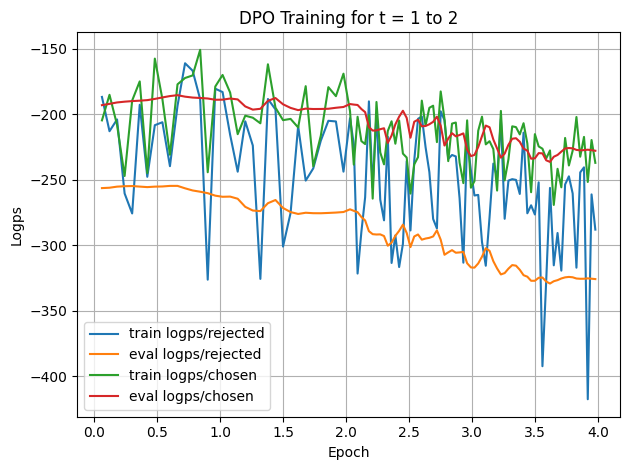

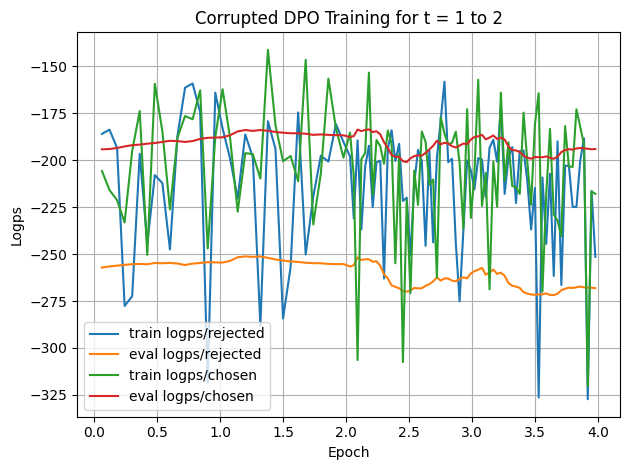

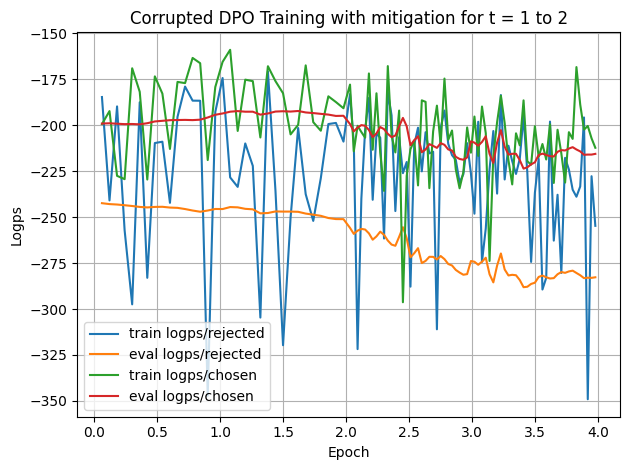

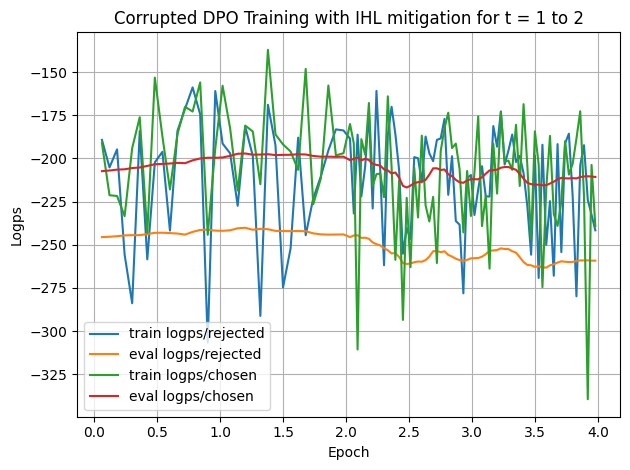

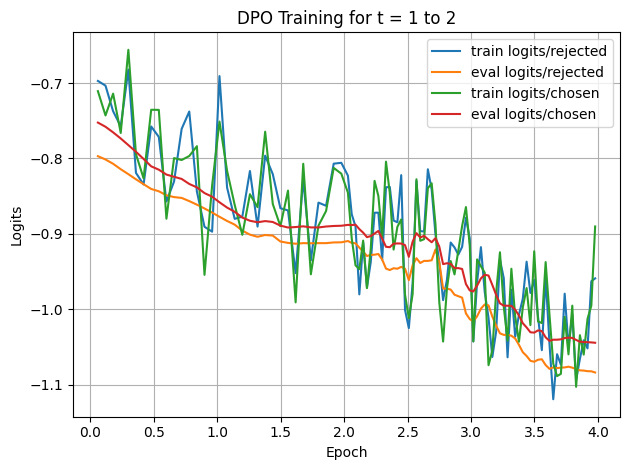

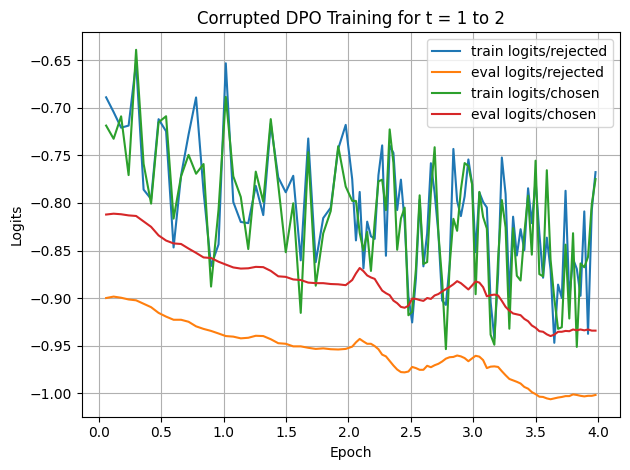

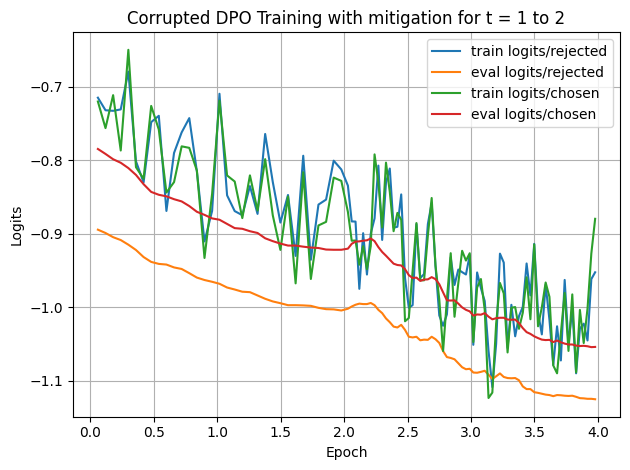

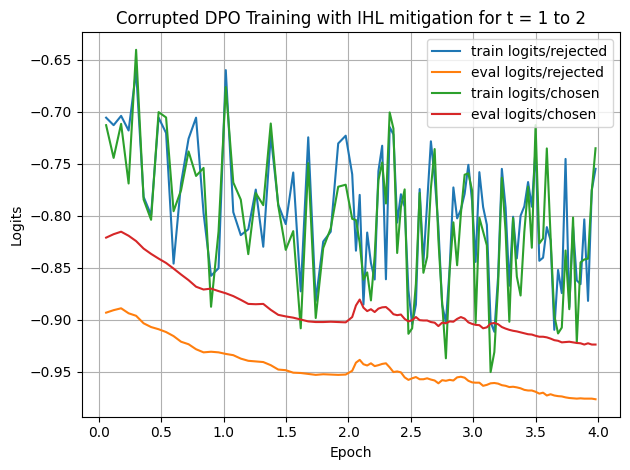

In [ ]:
metric_keys_list = [['logps/rejected', 'logps/chosen'], ['logits/rejected', 'logits/chosen']]
y_axis_labels = ['logps', 'logits']

for metric_keys, y_axis_label in zip(metric_keys_list, y_axis_labels):
    plots(combined_online_train_metric, combined_online_eval_metric, 
          metric_keys=metric_keys, y_axis_label=y_axis_label,
          title='DPO Training for t = 1 to 2')

    plots(combined_online_train_metric_cor, combined_online_eval_metric_cor, 
          metric_keys=metric_keys, y_axis_label=y_axis_label,
          title='Corrupted DPO Training for t = 1 to 2')
    
    plots(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
          metric_keys=metric_keys, y_axis_label=y_axis_label,
          title='Corrupted DPO Training with mitigation for t = 1 to 2')
    
    plots(combined_online_train_metric_IHL_mit, combined_online_eval_metric_IHL_mit, 
          metric_keys=metric_keys, y_axis_label=y_axis_label,
          title='Corrupted DPO Training with IHL mitigation for t = 1 to 2')
    

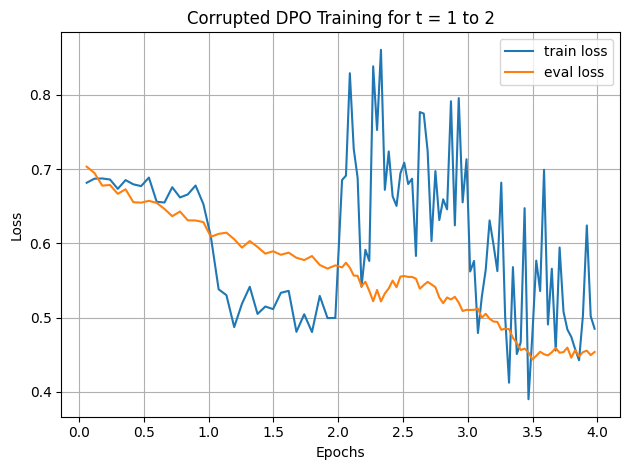

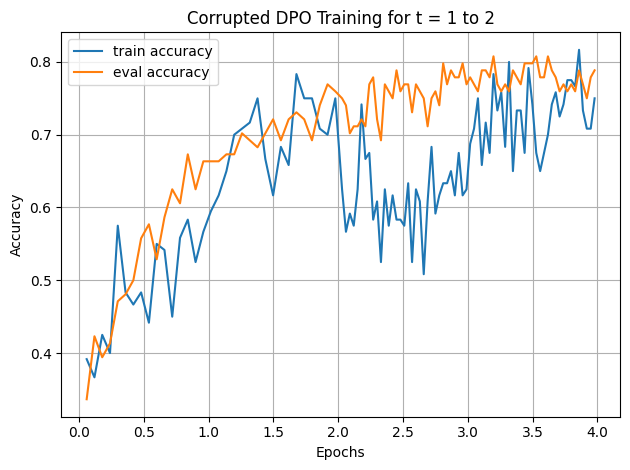

In [ ]:
plot(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
     metric_key='loss', y_axis_label='loss',
     title='Corrupted DPO Training for t = 1 to 2')

plot(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
     metric_key='rewards/accuracies', y_axis_label='accuracy', 
     title='Corrupted DPO Training for t = 1 to 2')

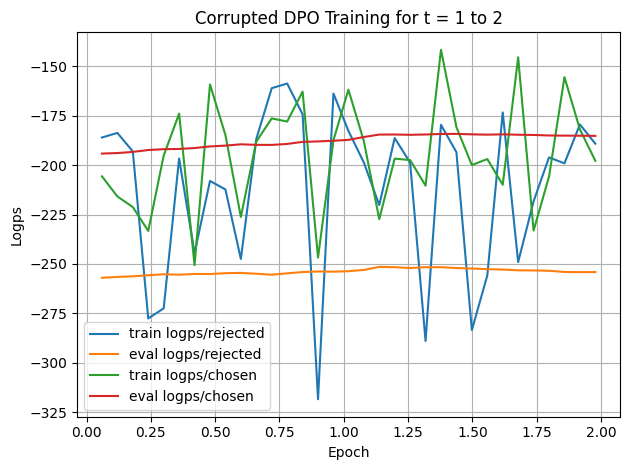

In [ ]:
plots(online_train_metric_mit_1, online_eval_metric_mit_1, 
     metric_keys=['logps/rejected', 'logps/chosen'], y_axis_label='logps',
     title='Corrupted DPO Training for t = 1 to 2')

Inverted eval chosen and rejected logps (above) <br><br>
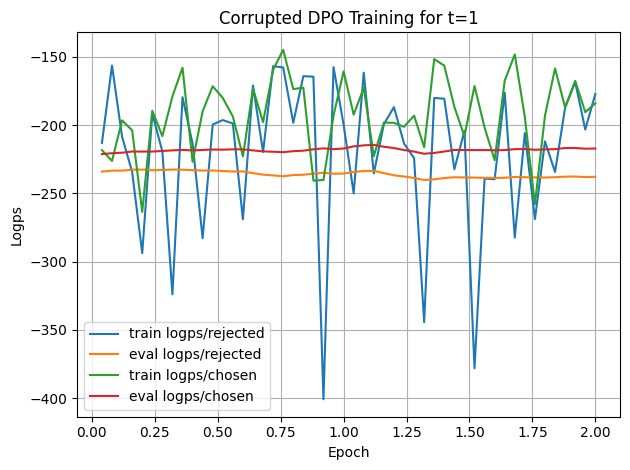

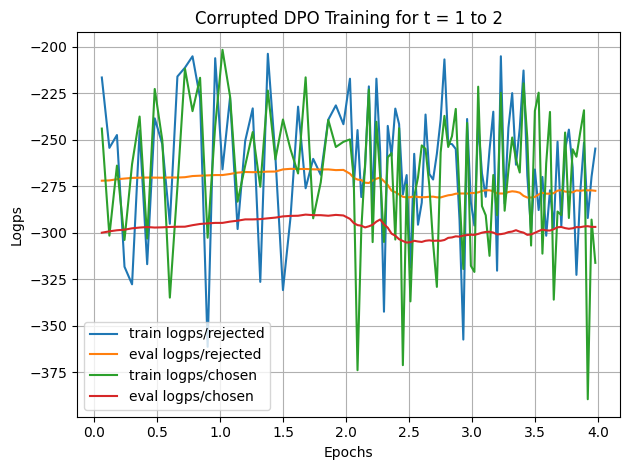

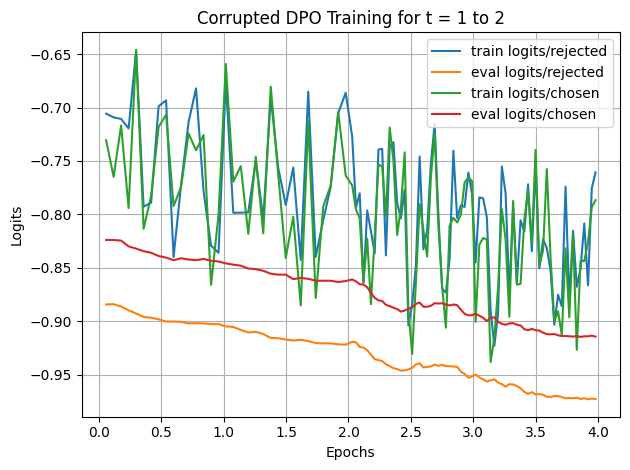

In [ ]:
plots(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
     metric_keys=['logps/rejected', 'logps/chosen'], y_axis_label='logps',
     title='Corrupted DPO Training for t = 1 to 2')

plots(combined_online_train_metric_mit, combined_online_eval_metric_mit, 
     metric_keys=['logits/rejected', 'logits/chosen'], y_axis_label='logits',
     title='Corrupted DPO Training for t = 1 to 2')